In [27]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Get the current working directory
current_directory = os.getcwd()

# Specify the full path to the 'Traffic.csv' file in your Downloads folder
file_path = os.path.join(current_directory, 'Downloads', 'Traffic.csv')

# Load the dataset
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())


          Time  Date Day of the week  CarCount  BikeCount  BusCount  \
0  12:00:00 AM    10         Tuesday        31          0         4   
1  12:15:00 AM    10         Tuesday        49          0         3   
2  12:30:00 AM    10         Tuesday        46          0         3   
3  12:45:00 AM    10         Tuesday        51          0         2   
4   1:00:00 AM    10         Tuesday        57          6        15   

   TruckCount  Total Traffic Situation  
0           4     39               low  
1           3     55               low  
2           6     55               low  
3           5     58               low  
4          16     94            normal  


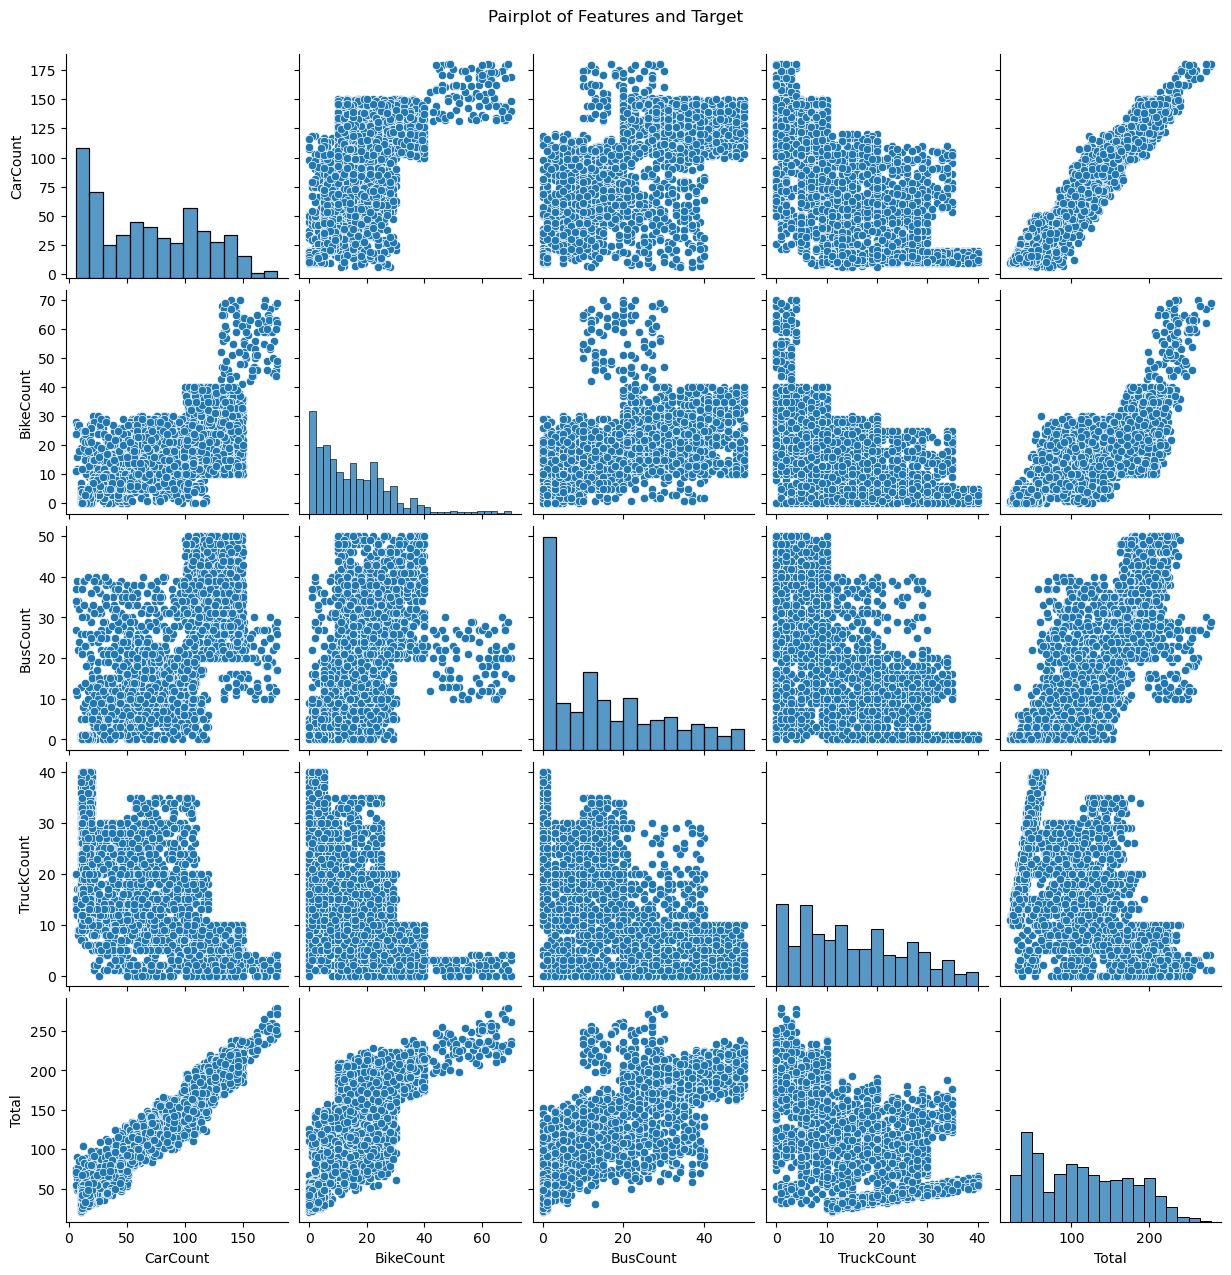

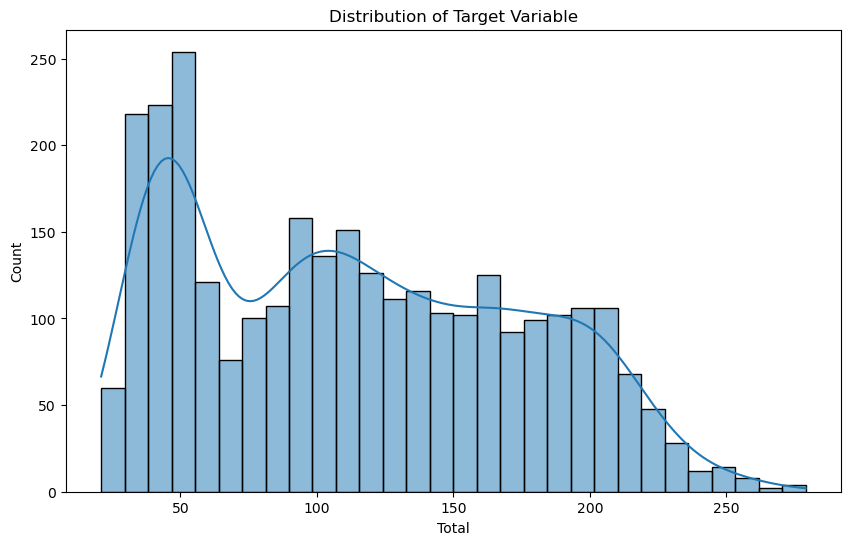

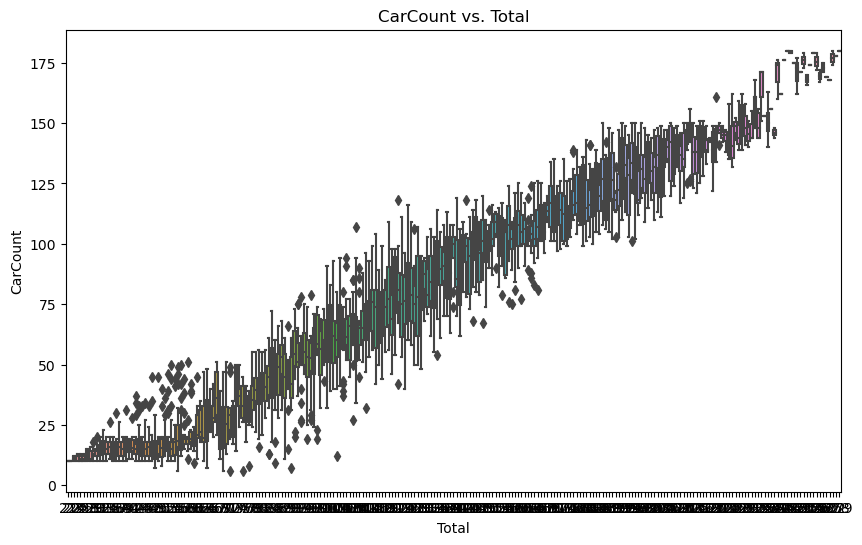

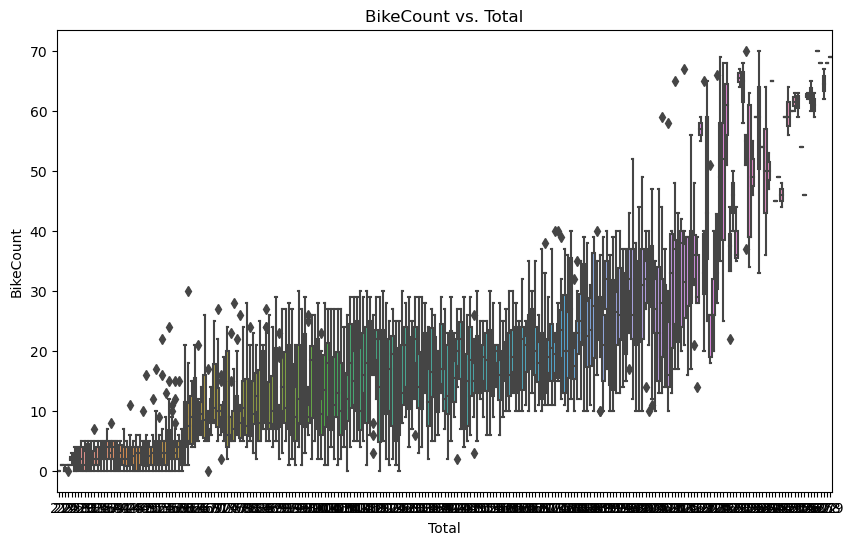

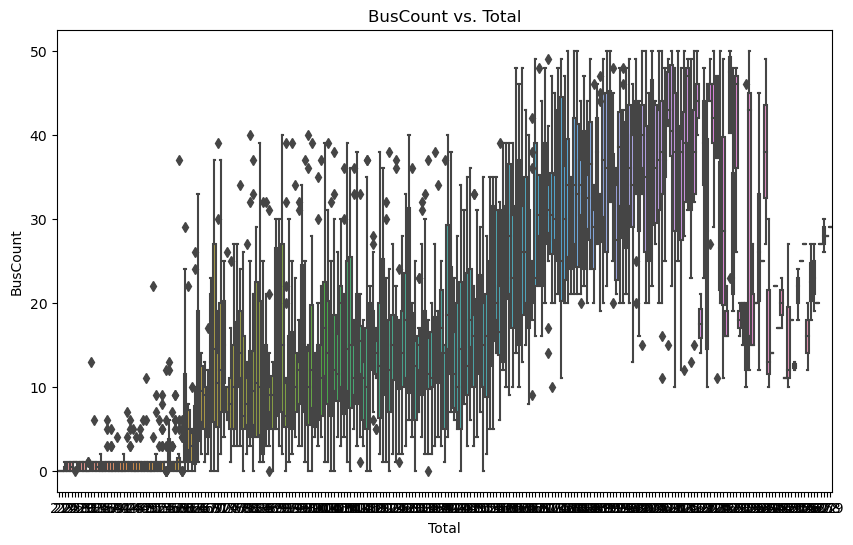

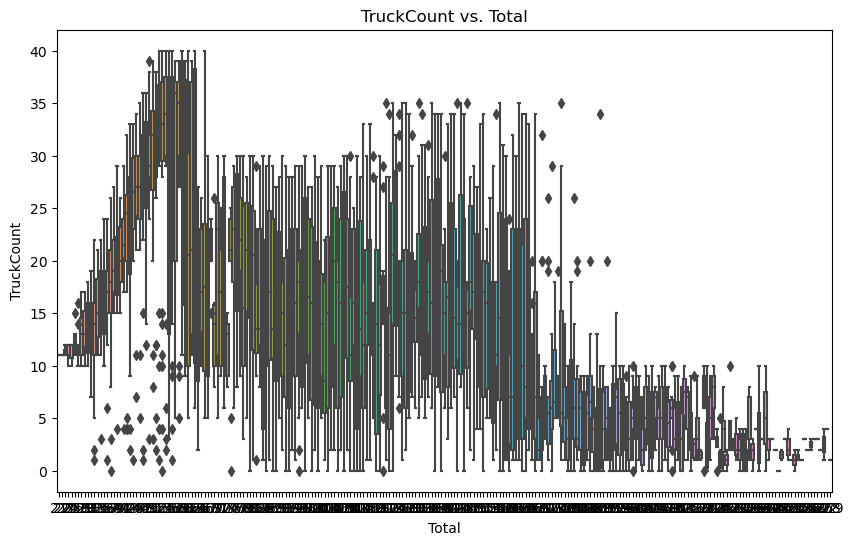

In [34]:
# Exploratory Data Analysis (EDA)
# EDA Plots and Analyses
# Pairplot for pairwise relationships
sns.pairplot(data[feature_cols + [target_col]])
plt.suptitle('Pairplot of Features and Target', y=1.02)
plt.show()

# Distribution plot for the target variable
plt.figure(figsize=(10, 6))
sns.histplot(data[target_col], kde=True, bins=30)
plt.title('Distribution of Target Variable')
plt.xlabel(target_col)
plt.show()

# Boxplot for each feature against the target variable
for feature in feature_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[target_col], y=data[feature])
    plt.title(f'{feature} vs. {target_col}')
    plt.show()

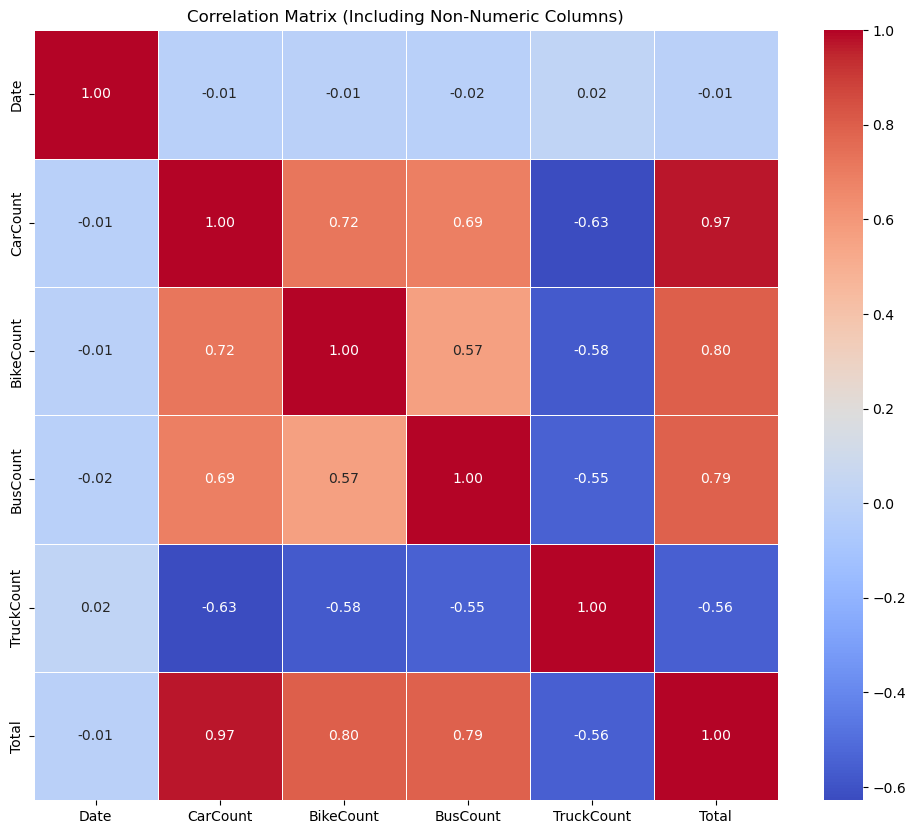

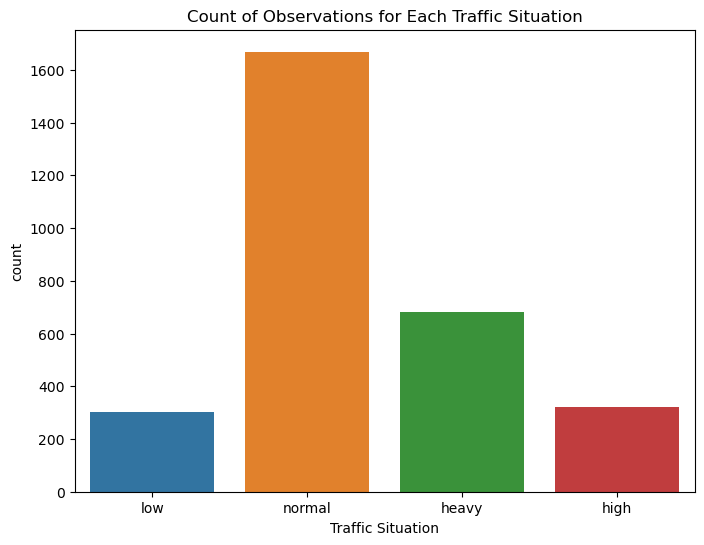

In [30]:
# Correlation heatmap (including non-numeric columns)
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix (Including Non-Numeric Columns)')
plt.show()

# Count plot for categorical variables (e.g., Traffic Situation)
plt.figure(figsize=(8, 6))
sns.countplot(x='Traffic Situation', data=data)
plt.title('Count of Observations for Each Traffic Situation')
plt.show()

Training R2 Score: 0.9985725315666825
Testing R2 Score: 0.9977704145531208


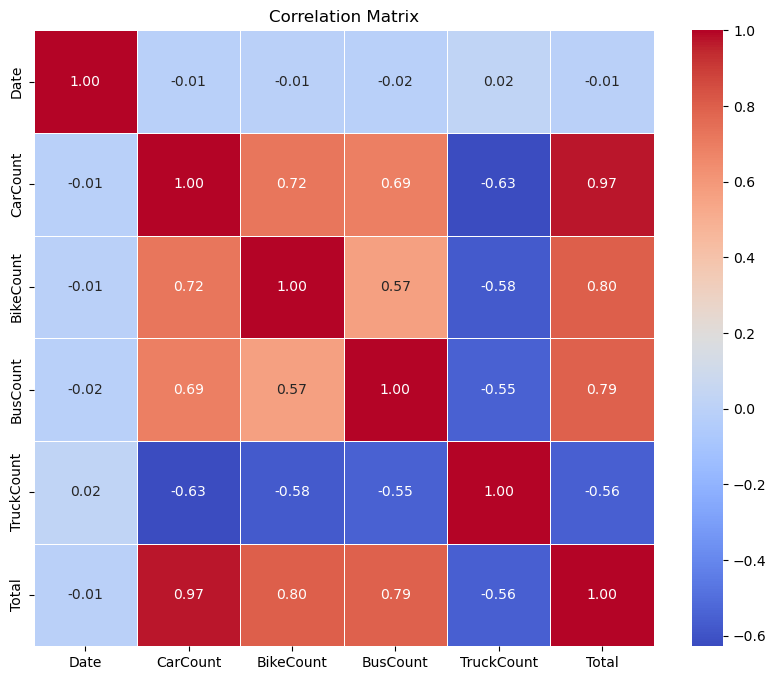

In [35]:
# Define features (X) and target variable (y)
# Adjust feature_cols and target_col based on your dataset
feature_cols = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount']
target_col = 'Total'

X = data[feature_cols]
y = data[target_col]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNeighbors model
knn_model = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the training set
train_preds = knn_model.predict(X_train)

# Make predictions on the testing set
test_preds = knn_model.predict(X_test)

# Evaluate the model
train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)

# Display evaluation metrics
print(f'Training R2 Score: {train_r2}')
print(f'Testing R2 Score: {test_r2}')

# Correlation and Covariance analysis
correlation_matrix = data.corr(numeric_only=True)
covariance_matrix = data.cov(min_periods=1, numeric_only=True)

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
